In [2]:
import sympy as sp
import script as rt
from IPython import display

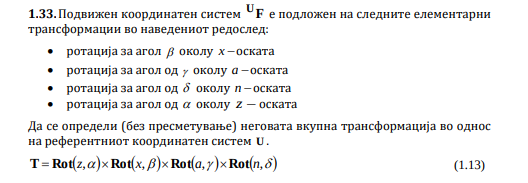

In [3]:
display.Image('images/1,33.png', width=700)

In [5]:
betha, gamma, delta, alpha = sp.symbols('betha, gamma, delta, alpha')
T1=rt.hrotation3('x', betha)
T2=rt.hrotation3('z', gamma) #a
T3=rt.hrotation3('x', delta) #n
T4=rt.hrotation3('z', alpha)
T=T4*T1*T2*T3
T

Matrix([
[-sin(alpha)*sin(gamma)*cos(betha) + cos(alpha)*cos(gamma), (-sin(alpha)*cos(betha)*cos(gamma) - sin(gamma)*cos(alpha))*cos(delta) + sin(alpha)*sin(betha)*sin(delta), -(-sin(alpha)*cos(betha)*cos(gamma) - sin(gamma)*cos(alpha))*sin(delta) + sin(alpha)*sin(betha)*cos(delta), 0],
[ sin(alpha)*cos(gamma) + sin(gamma)*cos(alpha)*cos(betha), (-sin(alpha)*sin(gamma) + cos(alpha)*cos(betha)*cos(gamma))*cos(delta) - sin(betha)*sin(delta)*cos(alpha), -(-sin(alpha)*sin(gamma) + cos(alpha)*cos(betha)*cos(gamma))*sin(delta) - sin(betha)*cos(alpha)*cos(delta), 0],
[                                    sin(betha)*sin(gamma),                                                  sin(betha)*cos(delta)*cos(gamma) + sin(delta)*cos(betha),                                                  -sin(betha)*sin(delta)*cos(gamma) + cos(betha)*cos(delta), 0],
[                                                        0,                                                                                               

# 11.04.2022

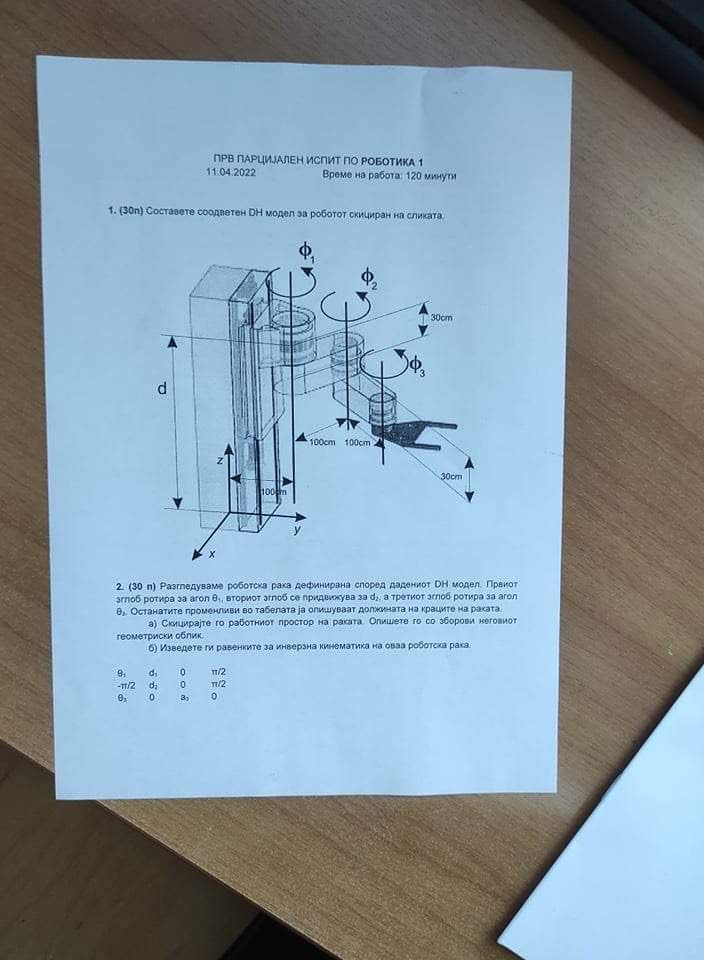

In [6]:
display.Image('images/11.04.2022-1,2.jpg', width=1000)

In [10]:
theta1, theta2, theta3, a1, a2, a3, a4, d, l1, l2= sp.symbols('theta1, theta2, theta3, a1, a2, a3, a4, d, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d,a4,0)
robot.add_revolute_joint(theta1,l1,a1,0)
robot.add_revolute_joint(theta2,l2,a2,0)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a1,1),(a2,1),(a3,1),(a4,1),(l1, -0.3),(l2, -0.3)])
robot.interact() 

In [12]:
T=robot.get_dh_matrix() #4 promenlivi -> 3 ravenki-> underactuated robot -> pomal broj na aktuatori od broj na promenlivi vo sistemot-zglobovi
T

Matrix([
[cos(theta1 + theta2 + theta3), -sin(theta1 + theta2 + theta3), 0, a1*cos(theta1) + a2*cos(theta1 + theta2) + a3*cos(theta1 + theta2 + theta3) + a4],
[sin(theta1 + theta2 + theta3),  cos(theta1 + theta2 + theta3), 0,      a1*sin(theta1) + a2*sin(theta1 + theta2) + a3*sin(theta1 + theta2 + theta3)],
[                            0,                              0, 1,                                                                      d + l1 + l2],
[                            0,                              0, 0,                                                                                1]])

# 2

In [15]:
theta1, theta3, d2, a1, a3= sp.symbols('theta1, theta3, d2, a1, a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,a1,0,sp.pi/2)
robot.add_prismatic_joint(-sp.pi/2,d,0,sp.pi/2)
robot.add_revolute_joint(theta3,0,a3,0)
robot.add_subs([(a1,1),(a3,1)])
robot.interact()

In [16]:
T= robot.get_dh_matrix()
T

Matrix([
[ sin(theta1)*sin(theta3),  sin(theta1)*cos(theta3), -cos(theta1),  (a3*sin(theta3) + d)*sin(theta1)],
[-sin(theta3)*cos(theta1), -cos(theta1)*cos(theta3), -sin(theta1), -(a3*sin(theta3) + d)*cos(theta1)],
[            -cos(theta3),              sin(theta3),            0,               a1 - a3*cos(theta3)],
[                       0,                        0,            0,                                 1]])

In [17]:
x, y, z, s1, c1, s3, c3, d = sp.symbols('x, y, z, s1, c1, s3, c3, d') 
equations = [
    (a3*s3+d)*s1 - x,
    -(a3*s3+d)*c1 - y,
    a1-a3*c3 - z,
    s1**2 + c1**2 - 1,
    s3**2 + c3**2 - 1,
]
solutions = sp.nonlinsolve(equations, [s1, c1, s3, c3, d])
solutions

{(x*(-x**2 - y**2 - sqrt(-a1**2*x**2 - a1**2*y**2 + 2*a1*x**2*z + 2*a1*y**2*z + a3**2*x**2 + a3**2*y**2 - x**2*z**2 - y**2*z**2))*sqrt(-a1**2 + 2*a1*z + a3**2 + x**2 + y**2 - z**2 - 2*sqrt(-a1**2*x**2 - a1**2*y**2 + 2*a1*x**2*z + 2*a1*y**2*z + a3**2*x**2 + a3**2*y**2 - x**2*z**2 - y**2*z**2))/(a1**2*x**2 + a1**2*y**2 - 2*a1*x**2*z - 2*a1*y**2*z - a3**2*x**2 - a3**2*y**2 + x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2), y*(x**2 + y**2 + sqrt(-a1**2*x**2 - a1**2*y**2 + 2*a1*x**2*z + 2*a1*y**2*z + a3**2*x**2 + a3**2*y**2 - x**2*z**2 - y**2*z**2))*sqrt(-a1**2 + 2*a1*z + a3**2 + x**2 + y**2 - z**2 - 2*sqrt(-a1**2*x**2 - a1**2*y**2 + 2*a1*x**2*z + 2*a1*y**2*z + a3**2*x**2 + a3**2*y**2 - x**2*z**2 - y**2*z**2))/(a1**2*x**2 + a1**2*y**2 - 2*a1*x**2*z - 2*a1*y**2*z - a3**2*x**2 - a3**2*y**2 + x**4 + 2*x**2*y**2 + x**2*z**2 + y**4 + y**2*z**2), (a1**2 - 2*a1*z - a3**2 + z**2 - sqrt(-a1**2*x**2 - a1**2*y**2 + 2*a1*x**2*z + 2*a1*y**2*z + a3**2*x**2 + a3**2*y**2 - x**2*z**2 - y**2*z**2))*sqrt(-

In [19]:
xn, yn, zn = -1, -2.5, 2.5
solutions_subs = solutions.subs([(a1, 1),(a3,1), (x, xn), (y, yn), (z, zn)])
solutions_subs

{(-0.044781647400761*(-7.25 - 3.01039864469807*I)*sqrt(0.787838597158335 - 0.790569415042095*I), -0.111954118501902*sqrt(0.787838597158335 - 0.790569415042095*I)*(7.25 + 3.01039864469807*I), 0.324666943655517*sqrt(0.787838597158335 - 0.790569415042095*I)*(1.25 - 3.01039864469807*I), -1.5, -2.75966902107189*sqrt(0.787838597158335 - 0.790569415042095*I)), (-0.044781647400761*(-7.25 + 3.01039864469807*I)*sqrt(0.787838597158335 + 0.790569415042095*I), -0.111954118501902*sqrt(0.787838597158335 + 0.790569415042095*I)*(7.25 - 3.01039864469807*I), 0.324666943655517*sqrt(0.787838597158335 + 0.790569415042095*I)*(1.25 + 3.01039864469807*I), -1.5, -2.75966902107189*sqrt(0.787838597158335 + 0.790569415042095*I)), (-0.044781647400761*sqrt(0.787838597158335 - 0.790569415042095*I)*(7.25 + 3.01039864469807*I), -0.111954118501902*(-7.25 - 3.01039864469807*I)*sqrt(0.787838597158335 - 0.790569415042095*I), 0.324666943655517*(-1.25 + 3.01039864469807*I)*sqrt(0.787838597158335 - 0.790569415042095*I), -1.5,

In [20]:
q_values = []
for i, solution in enumerate(solutions_subs):
    s1n, c1n, s3n, c3n, d = solution
    theta1n = sp.atan2(s1n, c1n)
    theta3n = sp.atan2(s3n, c3n)
    q_value = (
        float(theta1n.evalf(30)),
        float(theta3n.evalf(30)),
        float(d.evalf(30)) 
    )
    q_values.append(q_value)
    print(f'Решение {i+1} {q_value}') #site reshenija se kompleksni

TypeError: Cannot convert complex to float

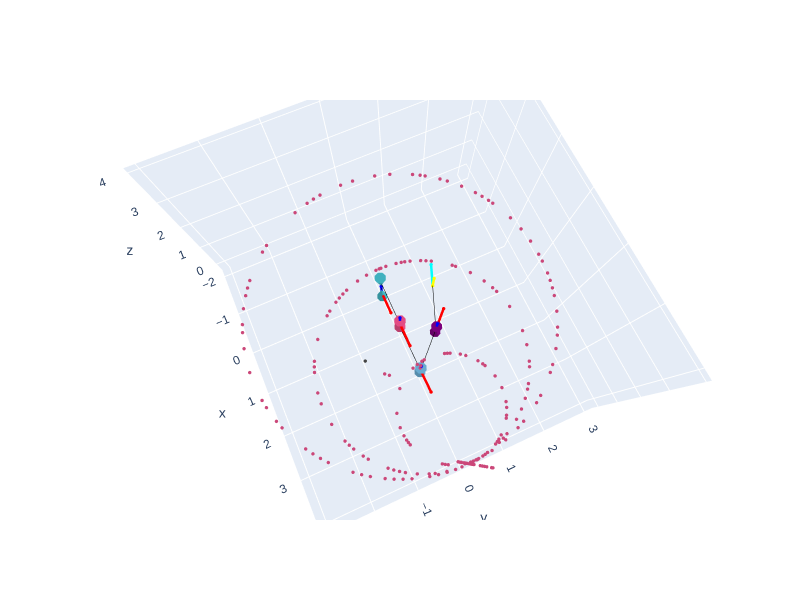

In [22]:
# rabotniot prostor kje bidat koncentrichni cilindri so razlichen radius vo zavisnost od rotacioaite zglobovi i razlichna visina vo zavisnost od gtranslatorniot zglob
display.Image('images/newplot.png', width=1000)

# 3

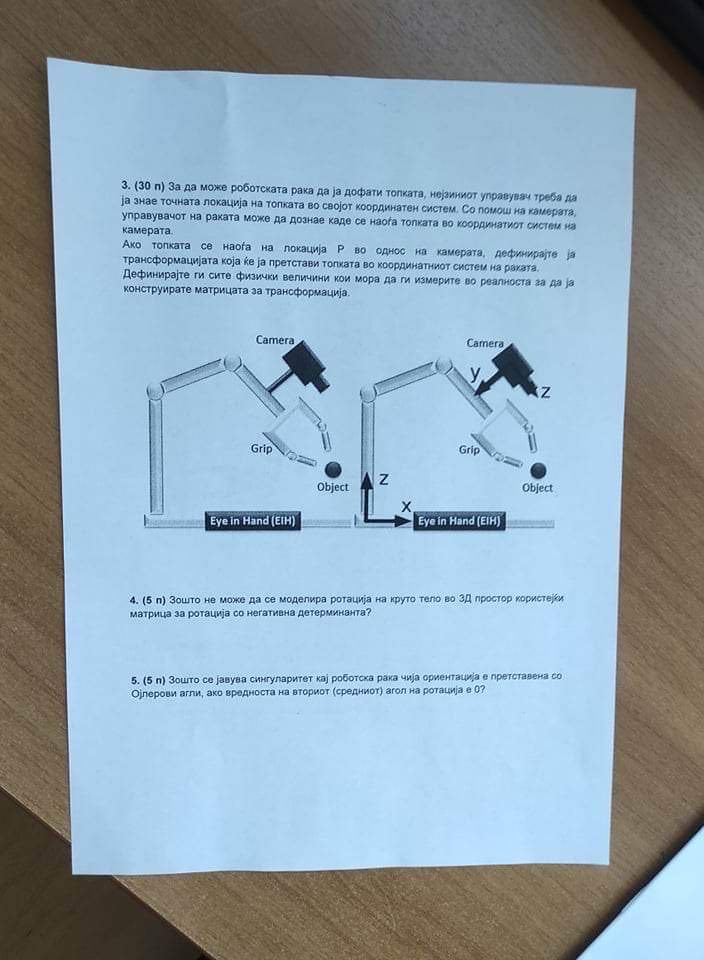

In [23]:
display.Image('images/11.04.2022.3.jpg', width=1000)

* задачата ќе ја решавам како примерот од аудиториски со дронот и камерата
* ориентацијата ќе ја претставам преку координатните системи преку ротациона матрица
* позицијата ќе ја претставам така што ќе го измерам растојанието од референтниот координатен почеток до топчето

In [26]:
x, y ,z =sp.symbols('x, y, z')
T= sp.Matrix([[0, sp.sqrt(2)/2, -sp.sqrt(2)/2, x],
            [1, 0, 0, y],
            [0, -sp.sqrt(2)/2, sp.sqrt(2)/2, z]])
T

Matrix([
[0,  sqrt(2)/2, -sqrt(2)/2, x],
[1,          0,          0, y],
[0, -sqrt(2)/2,  sqrt(2)/2, z]])

* матрица на ротација која има негативна детерминанта значи дека го дава истото тело само огледално пресликано
* сингуларитет кај Ојлерови агли се јавува кига вториот агол $theta2=0$ бидејќи така се поклопуваат првата и последната оска на ротација што губиме 2 степени на слобода 

# 30.01.2023

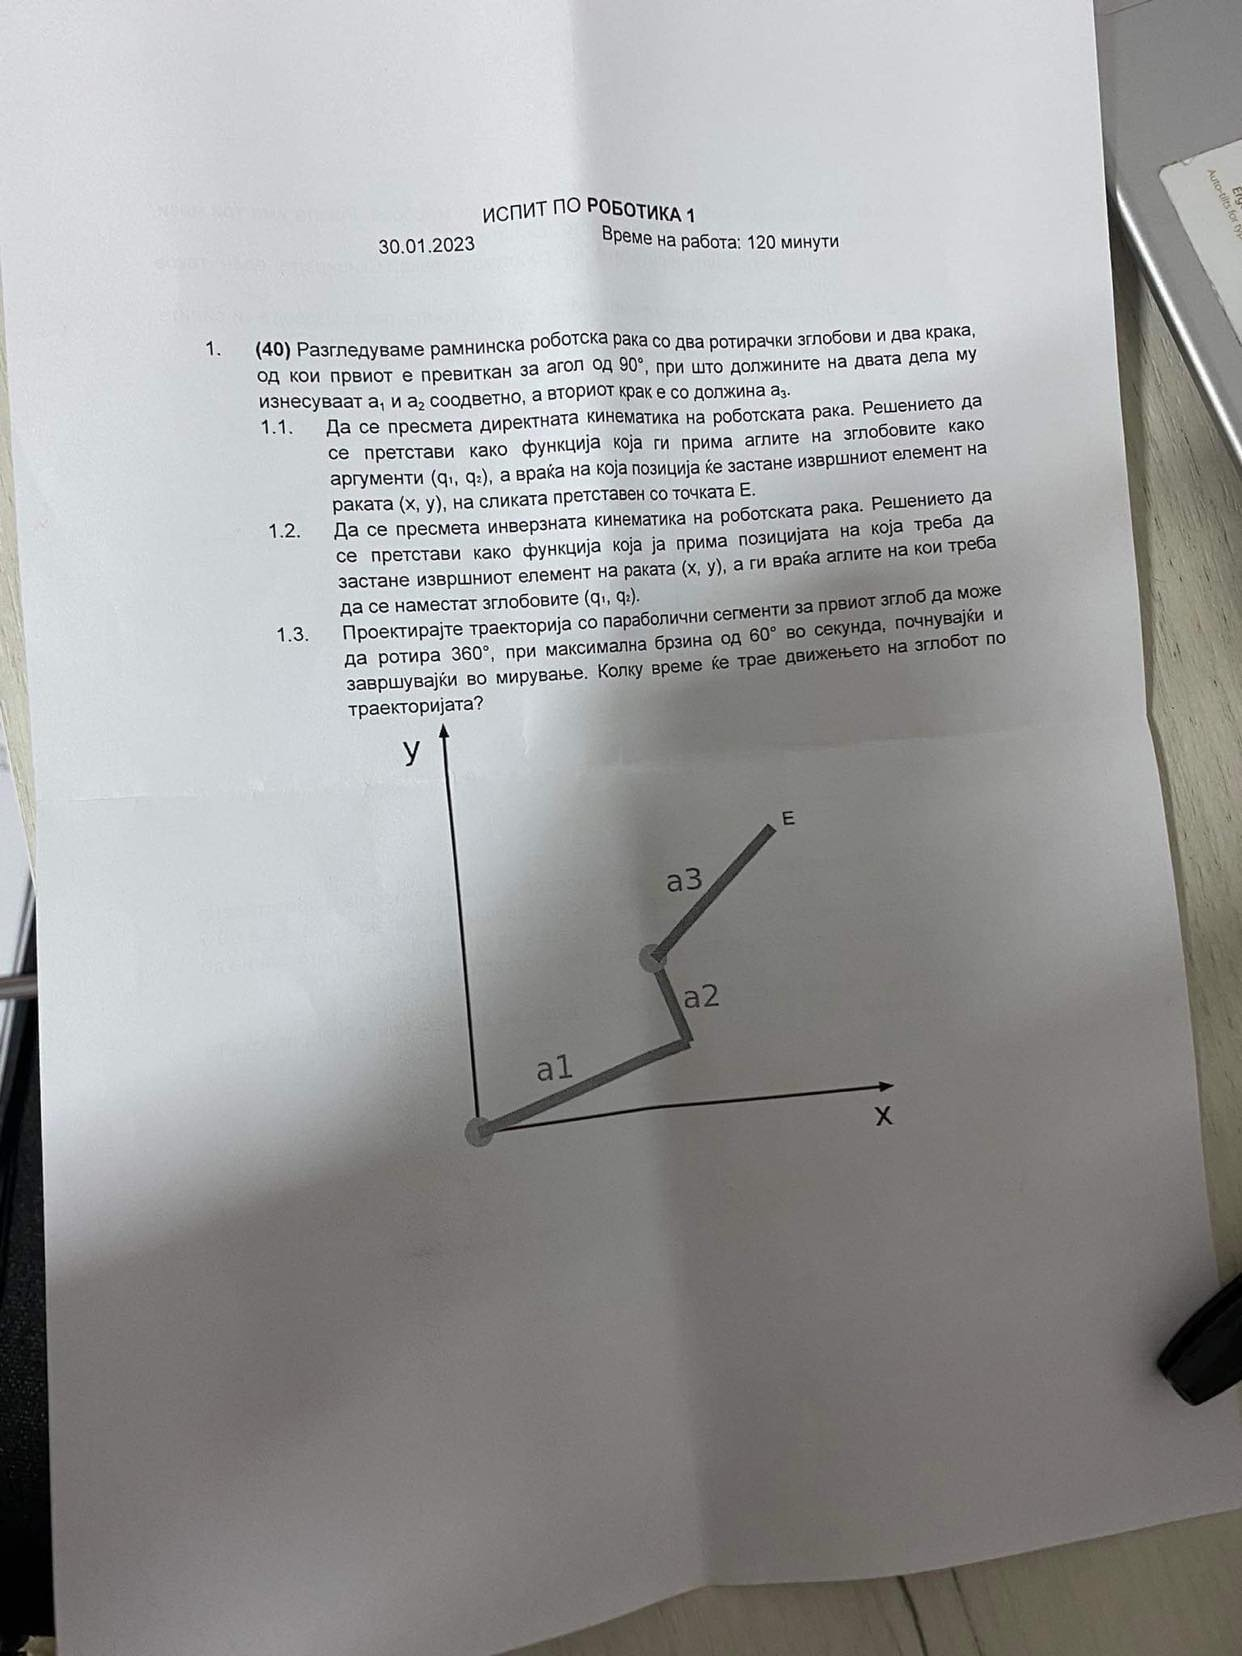

In [27]:
display.Image('images/30.01.2023.jpg', width=1000)

In [28]:
theta1, theta2, a2, a1, a3= sp.symbols('theta1, theta2, a2, a1, a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,a1,sp.pi/2)
robot.add_revolute_joint(sp.pi/2,0,a2,0) #mrtov zglob
robot.add_revolute_joint(theta2,0,a3,0)
robot.add_subs([(a1,1),(a3,1),(a2,1)])
robot.interact()

In [29]:
T=robot.get_dh_matrix()
T

Matrix([
[-sin(theta2)*cos(theta1), -cos(theta1)*cos(theta2),  sin(theta1), (a1 - a3*sin(theta2))*cos(theta1)],
[-sin(theta1)*sin(theta2), -sin(theta1)*cos(theta2), -cos(theta1), (a1 - a3*sin(theta2))*sin(theta1)],
[             cos(theta2),             -sin(theta2),            0,               a2 + a3*cos(theta2)],
[                       0,                        0,            0,                                 1]])

In [37]:
def direct_kinematics(q1n, q2n):
    xe=(a1-a3*sp.sin(q2n))*sp.cos(q1n)
    ye=(a1-a3*sp.sin(q2n))*sp.sin(q1n)
    ze=a2+a3*sp.cos(q2n)
    print(f'Извршниот елемент ќе се најде на положба: {xe,ye,ze}')
direct_kinematics(q1n=0.2, q2n=0.5)

Извршниот елемент ќе се најде на положба: (0.980066577841242*a1 - 0.469868946949515*a3, 0.198669330795061*a1 - 0.0952471509205588*a3, a2 + 0.877582561890373*a3)


In [40]:
def inverse_kinematics(xn, yn):
    x, y, z = sp.symbols('x, y, z')
    s1, c1, s2, c2 = sp.symbols('s1, c1, s2, c2')
    equations = [
        (a1-a3*s2)*c1 - x,
        (a1-a3*s2)*s1 - y,
        s1**2 + c1**2 - 1,
        s2**2 + c2**2 - 1]
    solutions = sp.nonlinsolve(equations, [s1, c1, s2, c2])
    solutions_subbed = solutions.subs([(x, xn), (y, yn), (a1, 1), (a3, 1)])
    for i, solution in enumerate(solutions_subbed):
        s1n, c1n, s2n, c2n = solution
        theta1n = sp.deg(sp.atan2(s1n, c1n)).evalf(3)
        theta2n = sp.deg(sp.atan2(s2n, c2n)).evalf(3)
        print(f'Решенија изразени преку нумерички вредности {i+1}: {(theta1n, theta2n)}')


inverse_kinematics(xn=0.5, yn=1.7)

Решенија изразени преку нумерички вредности 1: (73.6, -129.)
Решенија изразени преку нумерички вредности 2: (73.6, -50.5)
Решенија изразени преку нумерички вредности 3: (-106., 90.0 + 96.2*I)
Решенија изразени преку нумерички вредности 4: (-106., 90.0 - 96.2*I)


In [41]:
# treto i chetvrto reshenie ne se validni bidejkji imaat imaginarna vrednost

# 2, 3, 4

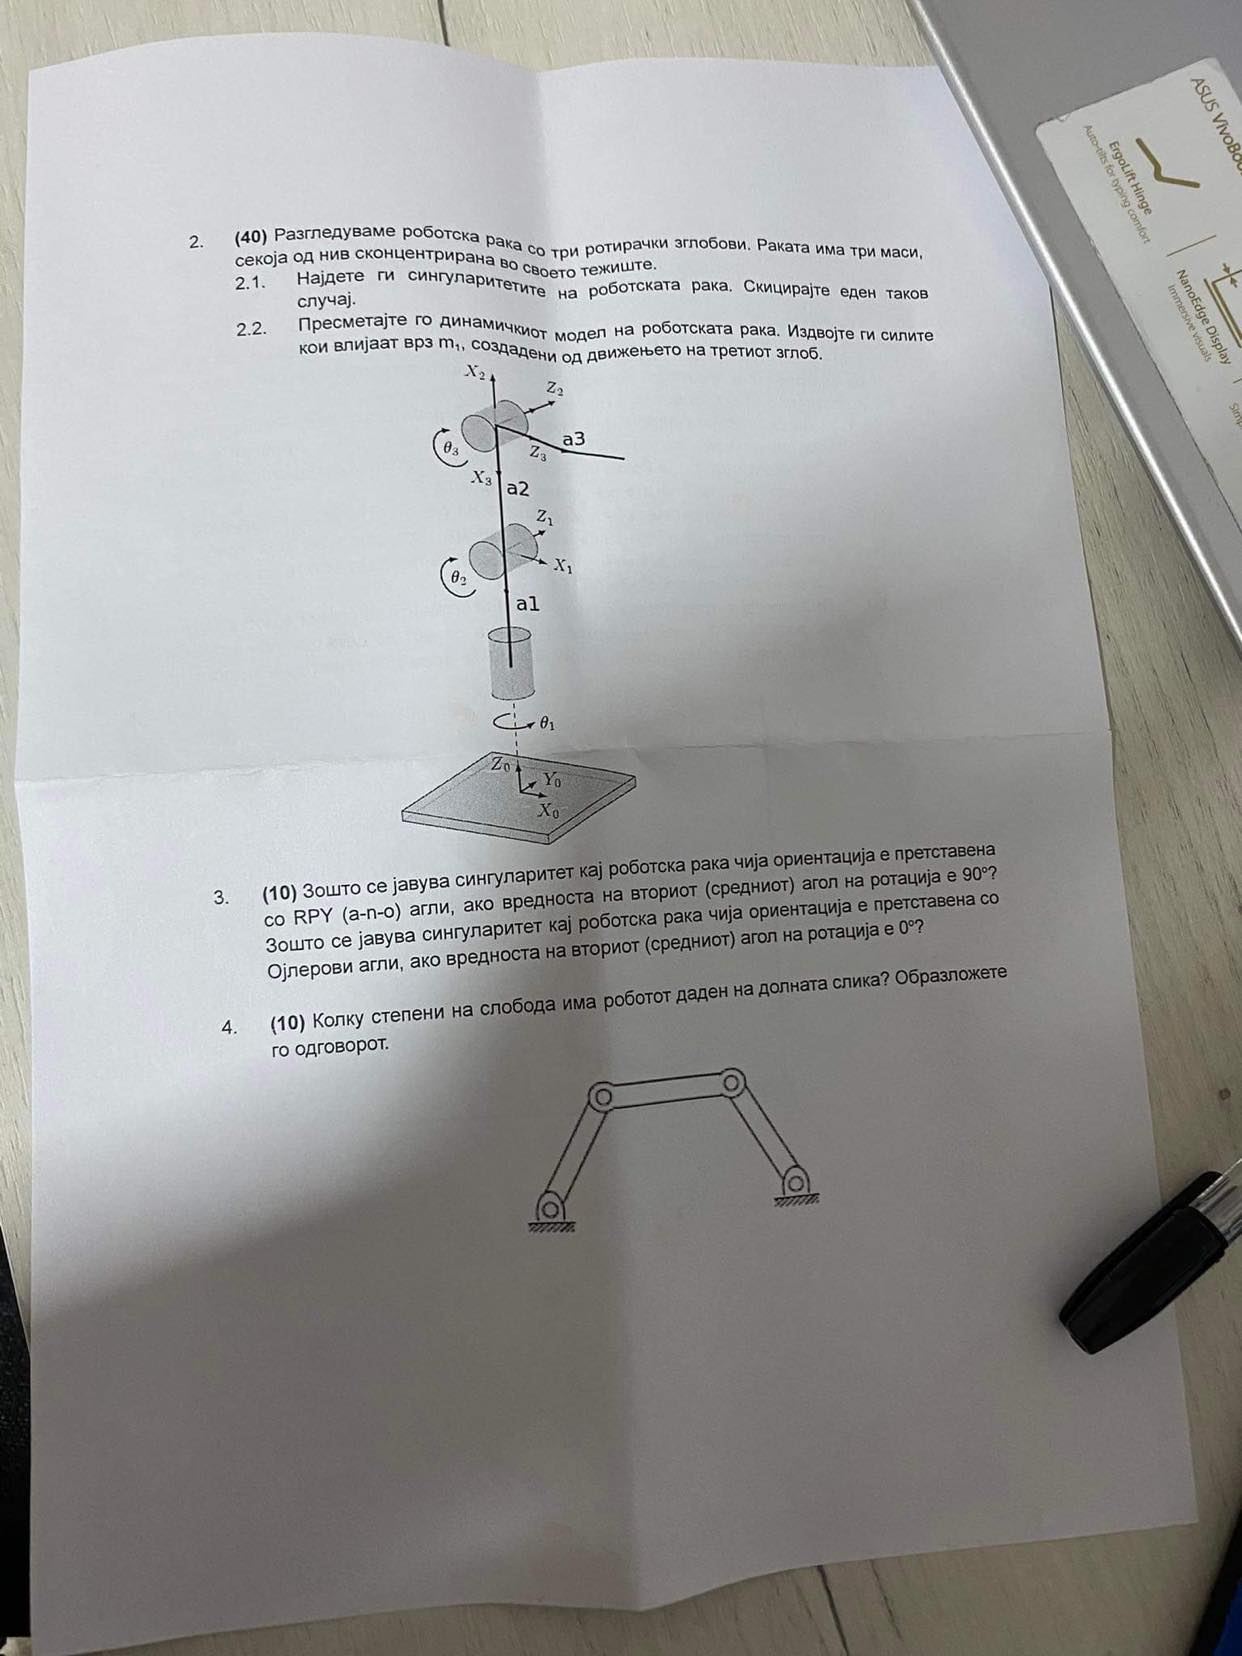

In [6]:
display.Image('images/30.01.2023.2.jpg', width=1000)

In [9]:
theta1, theta2, theta3, a1, a2, a3, a0= sp.symbols('theta1, theta2, theta3, a1, a2, a3, a0')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(0,a0,0,0) #mrtov zglob
robot.add_revolute_joint(theta1,a1,0,-sp.pi/2)
robot.add_revolute_joint(theta2,0,a2,0)
robot.add_revolute_joint(theta3,a3,0,-sp.pi/2)
robot.add_subs([(a1,1),(a0,1),(a2,1),(a3,1)])
robot.interact()

In [10]:
T= robot.get_dh_matrix()
T

Matrix([
[cos(theta1)*cos(theta2 + theta3),  sin(theta1), -sin(theta2 + theta3)*cos(theta1), a2*cos(theta1)*cos(theta2) - a3*sin(theta1)],
[sin(theta1)*cos(theta2 + theta3), -cos(theta1), -sin(theta1)*sin(theta2 + theta3), a2*sin(theta1)*cos(theta2) + a3*cos(theta1)],
[           -sin(theta2 + theta3),            0,             -cos(theta2 + theta3),                    a0 + a1 - a2*sin(theta2)],
[                               0,            0,                                 0,                                           1]])

In [15]:
def inverse_kinematics(xn, yn,zn):
    x, y, z = sp.symbols('x, y, z')
    s1, c1, s2, c2 = sp.symbols('s1, c1, s2, c2')
    equations = [
        a2*c1*c2-a3*s1 - x,
        a2*s1*c2+a3*c1 - y,
        a0+a1-a2*s2 - z,
        s1**2 + c1**2 - 1,
        s2**2 + c2**2 - 1]
    solutions = sp.nonlinsolve(equations, [s1, c1, s2, c2])
    solutions_subbed = solutions.subs([(x, xn), (y, yn), (z, zn), (a1, 1), (a3, 1), (a0,1), (a2,1)])
    for i, solution in enumerate(solutions_subbed):
        s1n, c1n, s2n, c2n = solution
        theta1n = sp.deg(sp.atan2(s1n, c1n)).evalf(3)
        theta2n = sp.deg(sp.atan2(s2n, c2n)).evalf(3)
        print(f'Решенија изразени преку нумерички вредности {i+1}: {(theta1n, theta2n)}')


inverse_kinematics(xn=0.5, yn=1.7, zn=2.6) # tri ravenki dve nepoznati -> overatuated robot -> besonechno mn reshenija

3) сингуларитет кај RPY агли околу подвижниот координатен систем при ротација на вториот агол за 90 степени се јавува губење на 2 степени на слобода затоа што првата и третата оска ќе станат паралелни
4) има еден степен на слобода затоа што сите лостови на зглобовите се поврзани меѓу себе а двата крајни зглоба се поврзани на подлогата, со тоа со мрдање на подлогата симултано ќе се мрдаат и двата зглоба па затоа има само еден степен на слобода

# popravena ispitna

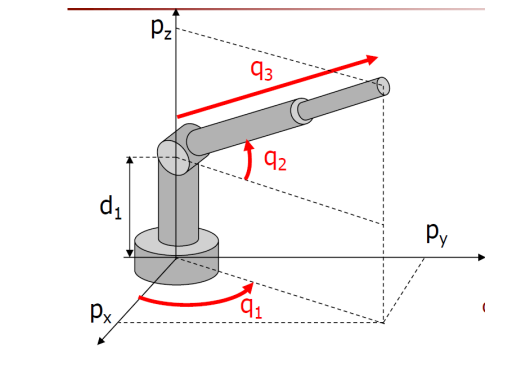

In [5]:
display.Image('images/4.png', width=700)

In [25]:
theta1, d1, theta2, d3= sp.symbols('theta1, d1, theta2, d3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,d1,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(d1,1)])
robot.interact()

# поправка

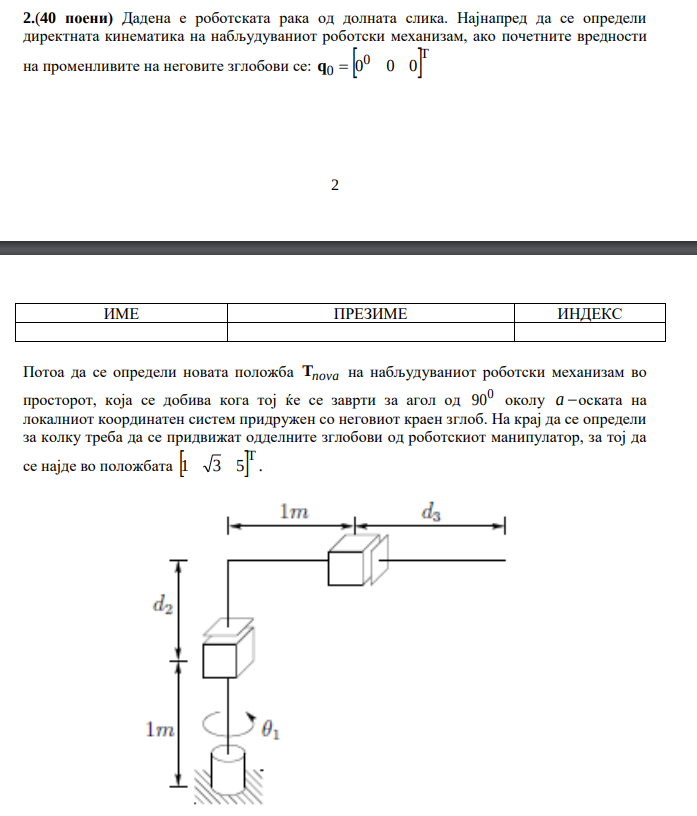

In [16]:
display.Image('images/11.png', width=700)

In [17]:
theta1, d2, d3, a1, a3, d4= sp.symbols('theta1, d2, d3, a1, a3, d4')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,d1,0,0)
robot.add_prismatic_joint(0,d2,0,-sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.add_subs([(d1,1)])
robot.interact()

In [18]:
T= robot.get_dh_matrix()
T.subs([(d3, d4+1)])

Matrix([
[cos(theta1),  0, -sin(theta1), -(d4 + 1)*sin(theta1)],
[sin(theta1),  0,  cos(theta1),  (d4 + 1)*cos(theta1)],
[          0, -1,            0,               d1 + d2],
[          0,  0,            0,                     1]])

In [24]:
def inverse_kinematics(xn, yn,zn):
    x, y, z = sp.symbols('x, y, z')
    s1, c1, d2, d4 = sp.symbols('s1, c1, d2, d4')
    equations = [
        -(d4+1)*s1 - x,
        (d4+1)*c1 - y,
        d1+d2 - z,
        s1**2 + c1**2 - 1]
    solutions = sp.nonlinsolve(equations, [s1, c1, d2, d4])
    solutions_subs = solutions.subs([(x, xn), (y, yn), (z, zn), (d1,1)])
    q_values = []
    for i, solution in enumerate(solutions_subs):
        s1n, c1n, d2n, d3n = solution
        theta1n = sp.atan2(s1n, c1n)
        q_value = (
            float(sp.deg(theta1n.evalf(30))),
            float(d2n.evalf(30)),
            float(d3n.evalf(30)),
        )
        q_values.append(q_value)
        print(f'Решение {i+1} {q_value}')


inverse_kinematics(xn=0.5, yn=1.7, zn=2.6) # mnogu dobra funkcija za inverzna

Решение 1 (-16.389540334034784, 1.6, 0.772004514666935)
Решение 2 (163.6104596659652, 1.6, -2.7720045146669348)
